# Base de datos Covid-19

El archivo a continuación es un ejemplo de situaciones que requieren análisis de grandes volúmenes de datos y la importancia de las herramientas estadísticas y computacionales para procesar estos datos con el fin de extraer conclusiones coherentes con la realidad que guíen la toma de decisiones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\Users\lucas\Downloads\osb_enftransm_Covid19_27092021.csv"
"""SaluData. Observatorio de Salud de Bogotá. (2020) Casos confirmados de COVID-19 en Bogotá D.C. 
        Secretaría Distrital de Salud. (Actualización del 27 de septiembre 2021) Última actualización disponible en:
        https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-confirmados-por-el-laboratorio-de-covid-19-bogota-d-c"""

CovidDf = pd.read_csv(path, sep = ';')
CovidDf

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
1449284,1449285,NaN,2021-09-25,Sin dato,Sin dato,17,1,F,En estudio,Casa,Leve
1449285,1449286,NaN,2021-09-26,Sin dato,Sin dato,79,1,M,En estudio,Casa,Leve
1449286,1449287,NaN,2021-09-25,Sin dato,Sin dato,38,1,M,En estudio,Casa,Leve
1449287,1449288,2021-09-09,2021-09-24,Sin dato,Sin dato,21,1,F,En estudio,Casa,Recuperado


Contiene información de casi un millón y medio de casos confirmados, cada uno documentado en 10 categorías. El archivo pesa 109mb, en perspectiva no es tan grande en comparación con otras bases de datos significativamente más pesadas y aún así programas como excel tienen dificultades para cargarlo en memoria local.

In [2]:
CovidDf.count()

CASO                           1449289
FECHA_DE_INICIO_DE_SINTOMAS     981982
FECHA_DIAGNOSTICO              1449289
CIUDAD                         1449289
LOCALIDAD_ASIS                 1449289
EDAD                           1449289
UNI_MED                        1449289
SEXO                           1449289
FUENTE_O_TIPO_DE_CONTAGIO      1449289
UBICACION                      1449289
ESTADO                         1449289
dtype: int64

Durante el auge de la pandemia era de vital importancia poder tomar decisiones basándose en esta información altamente convolucionada, contestando preguntas como: ¿Qué localidad tienen mayor número de casos graves?, ¿Cómo cambia el valor esperado de defunciones con el paso de los meses?, etc. La política basada en evidencias es producto del tratamiento estadístico de estos datos, para contestar estos interrogantes investigaremos casos de interés por medio de **filtros** o **máscaras**, haciendo uso de operadores booleanos podemos crear indexación para las *series* con los datos de interés:

In [3]:
Mask_abril = (CovidDf['FECHA_DIAGNOSTICO'] >= '2020-04-01') & (CovidDf['FECHA_DIAGNOSTICO'] <= '2020-04-31')
Mask_abril

0          False
1          False
2          False
3          False
4          False
           ...  
1449284    False
1449285    False
1449286    False
1449287    False
1449288    False
Name: FECHA_DIAGNOSTICO, Length: 1449289, dtype: bool

Haciendo uso de este operador de indexación se pueden recuperar los datos de interés del DataFrame, por ejemplo, los casos de abril del 2020:

In [4]:
def GetFilter(df,mask):
    filtered_df = df.loc[mask]
    return filtered_df

FECHA_DIAGNOSTICO_ABRIL = GetFilter(CovidDf,Mask_abril)
FECHA_DIAGNOSTICO_ABRIL

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
59,60,2020-04-16,2020-04-29,Bogotá,Puente Aranda,40,1,M,Relacionado,Casa,Recuperado
87,88,2020-03-21,2020-04-02,Bogotá,Suba,56,1,F,Relacionado,Casa,Recuperado
166,167,2020-04-13,2020-04-24,Bogotá,Kennedy,72,1,F,En estudio,Casa,Recuperado
171,172,2020-03-20,2020-04-03,Bogotá,Suba,33,1,F,Relacionado,Casa,Recuperado
174,175,2020-04-11,2020-04-24,Bogotá,Teusaquillo,8,1,M,Relacionado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
117886,117887,NaN,2020-04-06,Sin dato,Sin dato,71,1,F,En estudio,Casa,Recuperado
118880,118881,NaN,2020-04-06,Bogotá,Engativá,81,1,F,En estudio,Casa,Recuperado
130844,130845,2020-04-29,2020-04-29,Sin dato,Sin dato,47,1,M,En estudio,Casa,Recuperado
130848,130849,2020-04-21,2020-04-29,Bogotá,Suba,47,1,M,En estudio,Fallecido,Fallecido


In [5]:
print('En ABRIL del 2020, se documentaron',len(FECHA_DIAGNOSTICO_ABRIL),'casos.')

# Otra manera de almacenar la cantidad de casos sería con:
N = len(FECHA_DIAGNOSTICO_ABRIL.iloc[:,0])
N

En ABRIL del 2020, se documentaron 2332 casos.


2332

Otra aplicación práctica de la librería pandas es que permite contar la cantidad de elementos de un DataFrame con una determinada clave de la base de datos:

In [6]:
Counts_Localidad_abril = pd.value_counts(FECHA_DIAGNOSTICO_ABRIL['LOCALIDAD_ASIS'])
"""Counts_Localidad = pd.value_counts(FECHA_DIAGNOSTICO_MARZO['LOCALIDAD_ASIS']).sort_index() cumple la misma función pero
ordena alfabéticamente las claves de la base de datos. Sin el atributo sort_index() los datos son presentados del mayor
conteo al menor."""
Counts_Localidad_abril # La cantidad de casos, clasificados por localidad, durante marzo del 2020.

Kennedy               439
Suba                  292
Engativá              251
Bosa                  183
Usaquén               181
Ciudad Bolívar        150
Fontibón              115
Puente Aranda         103
Rafael Uribe Uribe    101
San Cristóbal          87
Teusaquillo            86
Chapinero              76
Usme                   65
Barrios Unidos         57
Tunjuelito             56
Los Mártires           26
Antonio Nariño         26
Santa Fe               18
Fuera de Bogotá        13
Sin dato                4
La Candelaria           3
Name: LOCALIDAD_ASIS, dtype: int64

### Investigación: ¿Cuál es el valor promedio de casos por localidad?

In [7]:
Counts_Localidad = pd.value_counts(CovidDf['LOCALIDAD_ASIS']) # Frecuencia por clases.
N = len(CovidDf.iloc[:,0]) # Cantidad total de casos.

Probabilities_localidad = Counts_Localidad/N # Se aplica el operador de división a toda la serie para obtener probabilidad.
Probabilities_localidad

Suba                  0.148022
Kennedy               0.126647
Engativá              0.112218
Usaquén               0.073885
Bosa                  0.073230
Ciudad Bolívar        0.057748
Fontibón              0.050653
Rafael Uribe Uribe    0.044758
Sin dato              0.041954
San Cristóbal         0.039357
Puente Aranda         0.038557
Usme                  0.033140
Chapinero             0.026895
Teusaquillo           0.025027
Barrios Unidos        0.021758
Tunjuelito            0.021484
Fuera de Bogotá       0.016772
Santa Fe              0.016653
Antonio Nariño        0.013388
Los Mártires          0.012579
La Candelaria         0.005214
Sumapaz               0.000061
Name: LOCALIDAD_ASIS, dtype: float64

Y en concordandia con la teoría de probabilidad y estadística:

In [8]:
np.sum(Probabilities_localidad)

1.0000000000000002

Cabe recordar que esta es sólo una muestra, no existe un modelo matemático perfecto capaz de describir conjunto poblacional completo y predecir cuando se va a contagiar. Estas probabilidades tienen cierto margen de error pero siguen siendo indicios que pueden guiar una toma de decisiones, este margen de error se reduce incluyendo cada vez más datos en la muestra, por lo que uno de los objetivos del **Big Data** es crear tratamientos estadísticos para colecciones de datos cada vez mayores.

## Tablas de contingencia

Esta función de *Pandas* permite establecer las relaciones entre dos variables de la base de datos, se puede usar esto por ejemplo, para relacionar el estado (leve, recuperado, grave, fallecido) con las localidades:

In [9]:
CrossTab = pd.crosstab( index = CovidDf['LOCALIDAD_ASIS'], columns = CovidDf['ESTADO'] )
CrossTab

ESTADO,Fallecido,Fallecido (No aplica No causa Directa),Grave,Leve,Moderado,Recuperado
LOCALIDAD_ASIS,,,,,,
Antonio Nariño,477,89,1,24,4,18808
Barrios Unidos,691,82,3,26,1,30731
Bosa,2068,252,10,91,12,103698
Chapinero,624,102,8,55,5,38185
Ciudad Bolívar,1845,279,9,83,9,81468
Engativá,3250,518,18,149,18,158683
Fontibón,1322,217,6,57,5,71804
Fuera de Bogotá,419,113,7,15,5,23749
Kennedy,3710,490,18,186,18,179126


Y si existe un estado de interés:

In [10]:
Fallecidos_Localidad = CrossTab.Fallecido
Fallecidos_Localidad

LOCALIDAD_ASIS
Antonio Nariño         477
Barrios Unidos         691
Bosa                  2068
Chapinero              624
Ciudad Bolívar        1845
Engativá              3250
Fontibón              1322
Fuera de Bogotá        419
Kennedy               3710
La Candelaria          124
Los Mártires           422
Puente Aranda         1227
Rafael Uribe Uribe    1565
San Cristóbal         1330
Santa Fe               537
Sin dato                96
Suba                  3623
Sumapaz                  1
Teusaquillo            684
Tunjuelito             746
Usaquén               1799
Usme                  1021
Name: Fallecido, dtype: int64

### Investigación: ¿Cuál es el valor medio de fallecidos?

In [11]:
mean = np.sum(Fallecidos_Localidad*Probabilities_localidad)
mean # Esto es sólo cierto para TODO el tiempo de documentación de la base de datos, esta no es información muy útil.

2129.5569917387074

## Presentación de resultados

<Figure size 432x288 with 0 Axes>

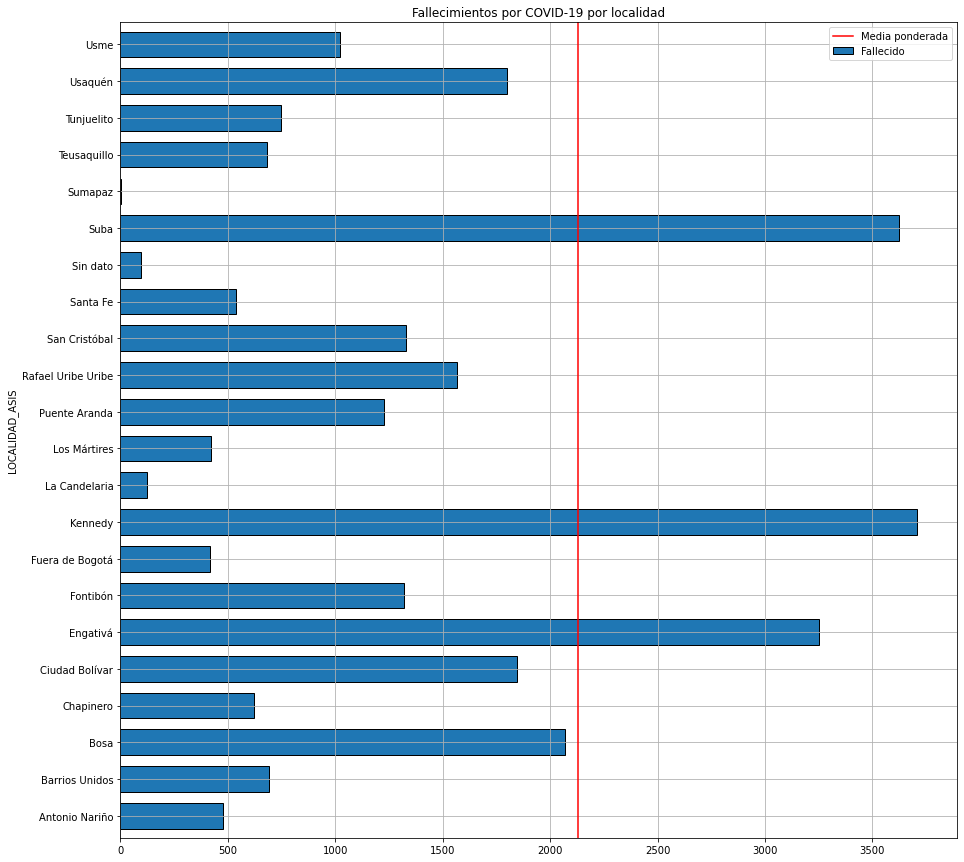

In [12]:
df_fallecidos = CovidDf[ CovidDf['ESTADO'] == 'Fallecido' ]
CrossTab_f = pd.crosstab( index = df_fallecidos['LOCALIDAD_ASIS'], columns = df_fallecidos['ESTADO'] )

fig = plt.figure()
ax = CrossTab_f.plot(kind='barh',stacked=False, width=0.7, figsize=(15,15),ec='k')
ax = ax.axvline( x = mean, color='r',label='Media ponderada')
plt.title('Fallecimientos por COVID-19 por localidad')
plt.legend()
plt.grid()
plt.show()

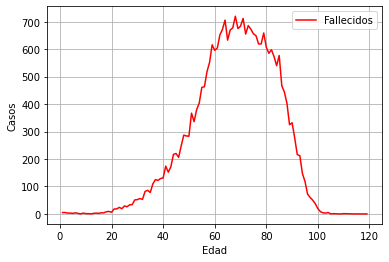

In [13]:
EDAD = pd.crosstab( index = CovidDf['EDAD'], columns = CovidDf['ESTADO'])
plt.plot(EDAD.Fallecido,c='r',label='Fallecidos')
plt.xlabel('Edad')
plt.ylabel('Casos')
plt.legend()
plt.grid()
plt.show()

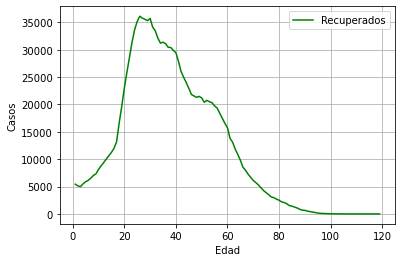

In [14]:
EDAD = pd.crosstab( index = CovidDf['EDAD'], columns = CovidDf['ESTADO'])
plt.plot(EDAD.Recuperado,c='g',label='Recuperados')
plt.xlabel('Edad')
plt.ylabel('Casos')
plt.legend()
plt.grid()
plt.show()

### Investigación: ¿Cómo varió la media de defunciones con el tiempo?

Para realizar esta tarea de forma automatizada, hay que definir funciones cuyo resultado sean los límites de las máscaras y realizar el mismo tratamiento estadístico por mes para graficar:

In [15]:
def GetLowerBounds():
    Bounds = []
    
    for year in range(0,2):
        date_y = '202{}-'.format(year)
        
        for month in range(1,10):
            date_m = '0{}-01'.format(month)
            Bounds.append(date_y+date_m)
            
        for month in range(10,13):
            date_m_2 = '{}-01'.format(month)
            Bounds.append(date_y+date_m_2)
            
    return Bounds

def GetUpperBounds():
    Bounds = []
    
    for year in range(0,2):
        date_y = '202{}-'.format(year)
        
        for month in range(1,10):
            date_m = '0{}-31'.format(month)
            Bounds.append(date_y+date_m)
            
        for month in range(10,13):
            date_m_2 = '{}-31'.format(month)
            Bounds.append(date_y+date_m_2)
            
    return Bounds

Lowers = GetLowerBounds()[2:-3] # Con indexing & slicing se ignoran los meses no presentes en los que no hay diagnósticos:
Uppers = GetUpperBounds()[2:-3] # febrero del 2020 y los meses posteriores a septiembre de 2021.

def GetMasks(L_bounds:list, U_bounds:list):
    Masks = []
    for i in range(len(L_bounds)):
        Masks.append((L_bounds[i],U_bounds[i]))
    return Masks

M = np.array(GetMasks(Lowers,Uppers))
M

array([['2020-03-01', '2020-03-31'],
       ['2020-04-01', '2020-04-31'],
       ['2020-05-01', '2020-05-31'],
       ['2020-06-01', '2020-06-31'],
       ['2020-07-01', '2020-07-31'],
       ['2020-08-01', '2020-08-31'],
       ['2020-09-01', '2020-09-31'],
       ['2020-10-01', '2020-10-31'],
       ['2020-11-01', '2020-11-31'],
       ['2020-12-01', '2020-12-31'],
       ['2021-01-01', '2021-01-31'],
       ['2021-02-01', '2021-02-31'],
       ['2021-03-01', '2021-03-31'],
       ['2021-04-01', '2021-04-31'],
       ['2021-05-01', '2021-05-31'],
       ['2021-06-01', '2021-06-31'],
       ['2021-07-01', '2021-07-31'],
       ['2021-08-01', '2021-08-31'],
       ['2021-09-01', '2021-09-31']], dtype='<U10')

In [16]:
# Prueba: Crear una máscara con una fecha arbitraria del array de fechas
# mask_19 = (CovidDf['FECHA_DIAGNOSTICO'] >= M[18][0]) & (CovidDf['FECHA_DIAGNOSTICO'] <= M[18][1])
# mask_19

def mask_iteration(array):
    all_masks = []
    for i in range(len(M)):
        mask = (CovidDf['FECHA_DIAGNOSTICO'] >= M[i][0]) & (CovidDf['FECHA_DIAGNOSTICO'] <= M[i][1])
        all_masks.append(mask)
    return all_masks

all_masks = mask_iteration(M)

# Prueba: Comprobar la indexación en todas las máscaras
# all_masks

In [30]:
# NECESITA CORRECCIÓN (maybe)
means = []
for i in range(len(all_masks)):
    mask_i = GetFilter(CovidDf,all_masks[i])
    N = len(mask_i.iloc[:,0])
    Counts = pd.value_counts(mask_i['LOCALIDAD_ASIS'])
    Probabilities = Counts/N
    CrossTab = pd.crosstab( index = mask_i['LOCALIDAD_ASIS'], columns = mask_i['ESTADO'] )
    Fallecidos = CrossTab.Fallecido
    mean = np.sum(Fallecidos*Probabilities)
    means.append(mean)
    
means

[3.4709677419354836,
 10.057032590051461,
 26.329557291666664,
 58.170587450526966,
 202.98100429022426,
 204.4425414314415,
 76.89849496232932,
 63.6872223673896,
 69.62236022621519,
 149.83293395955138,
 217.86933737456712,
 47.760005725737194,
 48.251808108287435,
 193.26008131767082,
 292.8967698047427,
 357.4929747321362,
 127.30799894092729,
 14.985647498831229,
 3.224343675417661]

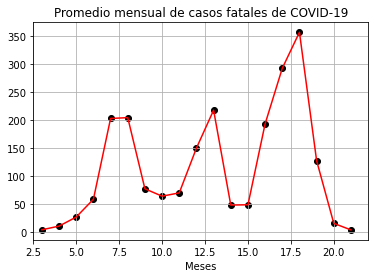

In [44]:
months = np.arange(3,22,1)

plt.plot(months,means,c='r')
plt.scatter(months,means,c='k')
plt.grid()
plt.xlabel('Meses')
plt.xlim(2.5,22)
plt.title('Promedio mensual de casos fatales de COVID-19')
plt.show()